In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
%matplotlib inline

#                                                       Outline

## Section 1: Support Vector Machines: Intuition & Understanding

## Section 2: Support Vector Machines: Application
#### Section 2.1 Linear SVMs
#### Section 2.2 SVMs with kernels
#### Section 2.3 Cross Validation for tuning
#### Section 2.4 SVMs for Image data

## Section 1. Intuition Underlying Support Vector Machines
Lets assume that we have to differentiate between dogs and cats. We determine that the most discriminative features for this classification are the _ear sharpness_ and the _snout length_ of the samples. We arrange our samples on a two-dimensional space and find that indeed there is some separation between the classes.
![alt text](Errata/SVM1.pdf "DogsvsCats")
However, where should we place our decision boundary? In the figure, we show many possible linear decision boundaries, all of which seem to work. In that context, which one is correct? A sub-optimal choice of the decision boundary, would lead to misclassification of examples from either class that lie in proximity to the "true" decision boundary.
![alt text](Errata/SVM2.pdf "DogsvsCats")
Such samples that are closest to the other classes, are referred to as _support vectors_ (A point in a euclidean space is a vector after all). The Support Vector Machine (SVM) algorithm determines it boundaries based on these samples. In a nutshell, the SVM rationale ignores the "normal" instances of a class and focuses instead on the extreme instances to differentiate between classes.
![alt text](Errata/SVM3.pdf "DogsvsCats")
In the figure above, the decision boundary is marked in black shade and the support vectors in grey. The distance between the two is referred to as the margin. Explicitly, the shortest distance between the observations and the decision boundary is the _margin_. In an ideal case, we want this margin to be large (so as to not misclassify extreme samples). The decision boundary that maximizes this margin is referred to as (surprise!) the Maximum Margin Classifier. However, the Maximum Margin Classifier is very sensitive to outliners.  

If the data is not linearly separable, the SVM machinery relies on kernels to transform the space to get separation. Examples of such kernels include polynomial kernels, sigmoid kernels, etc. With SVMs, a popular kernel is the Radial Basis Function (RBF), $K(x,y)=e^{-\gamma ||x-y||^2}$. To optimize the parameters of such kernels, K-fold corss validation is used.

In the upcoming exercises, we shall go over examples of linear SVMs, SVMs with kernels and how to tune said kernels.

## Section 2: Support Vector Machines: Application

#### Section 2.1 Linear SVMs

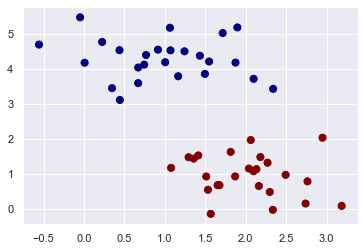

In [2]:
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet');

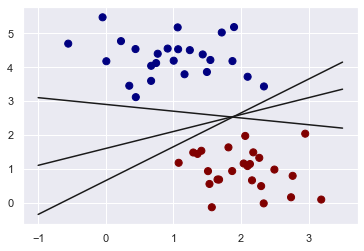

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

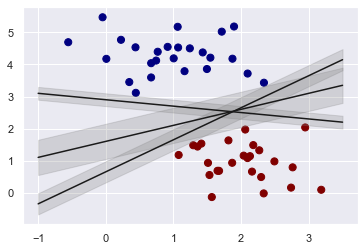

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',color='grey', alpha=0.25)

In [7]:
model = SVC(kernel='linear', C=100)
model.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

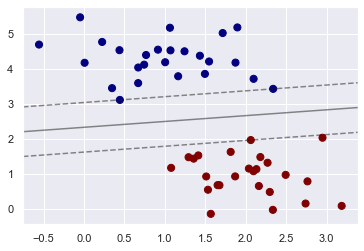

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(model);

#### Exercise 1

Apply the SVC, with a linear kernel...same as above, to separate between the blue and red points generated below.
Use the helper function "plot_svc_decision_function" to plot your decision boundary and your margins.

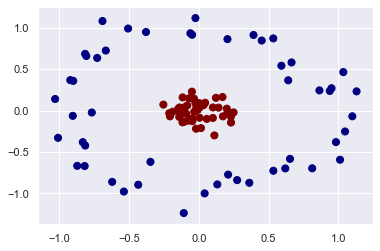

In [10]:
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet');

In [12]:
clf = SVC(kernel='rbf', C=100)
clf.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

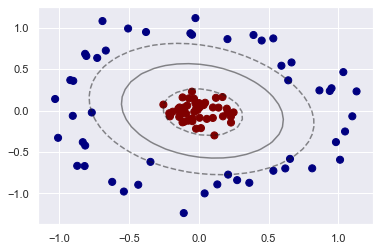

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none');

#### Section 2.3 Exploring the Hyperparameters

In [14]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.8)

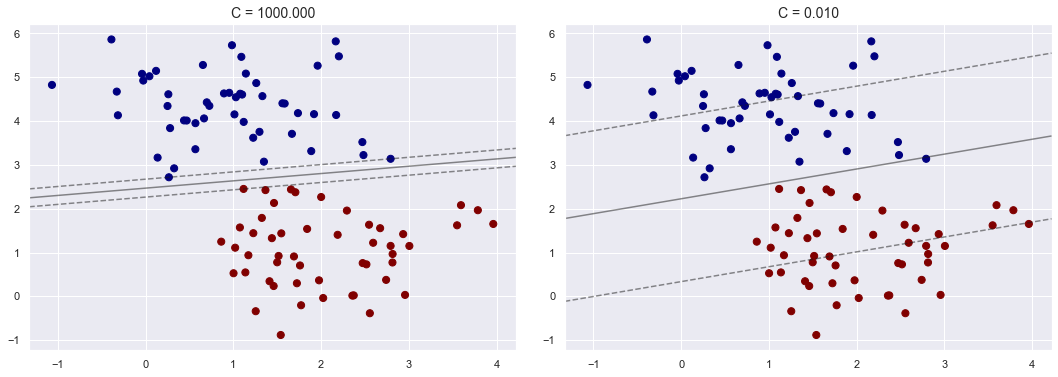

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [1000.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.3f}'.format(C), size=14)

### Exercise 2

SLAC personnel are known the world over for their refined tastes and predilection for fine dining. In this context, we'll create a classifier to help us determine the quality of red wines. I've prepared the data for you.

1. Please scale the data.

2. Please split the dataset into test and train sets.

3. Train a default SVC to classify the data samples.

4. Estimate the accuracy of your classifier on the test data.

In [28]:
df = pd.read_csv('Errata/winequality-red.csv',sep=";")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


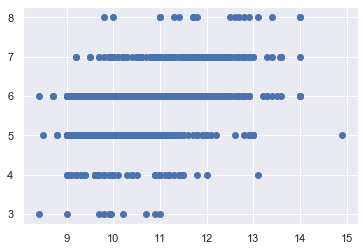

In [30]:
plt.scatter(df.alcohol,df.quality)

In [21]:
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories

In [26]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [23]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [25]:
X.shape, y.shape

((1599, 11), (1599,))

#### Section 2.4 SVMs for Image data

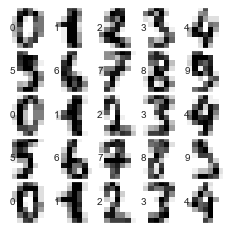

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
fig = plt.figure(figsize=(3, 3)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 4, str(digits.target[i]))

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)

In [38]:
pca = RandomizedPCA(n_components=14, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'svc__C': 50, 'svc__gamma': 0.005}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [41]:
from sklearn import metrics
print(metrics.classification_report(yfit, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.91      0.96        47
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      0.97      0.99        39
           5       0.98      0.94      0.96        50
           6       0.98      1.00      0.99        51
           7       0.98      1.00      0.99        47
           8       0.90      1.00      0.95        43
           9       0.96      0.96      0.96        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



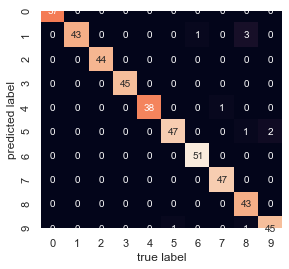

In [43]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Exercise 1 solution

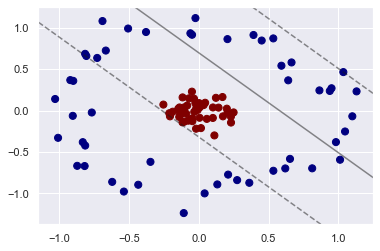

In [11]:
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(clf, plot_support=False);

![alt text](Errata/fin.jpg "DogsvsCats")